In [47]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import PrecisionRecallDisplay

# (1) precision@k, recall@k -- pg23

In [48]:
recommendation_A = np.array([False, True, True, True, True, True, False, False, False, False])  
recommendation_B = np.array([True, True, True, False, False, False, False, False, True, True])
num_relevant = 5 
rank_discount = np.array(range(1,11))

In [49]:
rank_discount

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [50]:
precision_A = np.cumsum(recommendation_A)/rank_discount
precision_B = np.cumsum(recommendation_B)/rank_discount

In [51]:
precision_A

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ,
       0.83333333, 0.71428571, 0.625     , 0.55555556, 0.5       ])

In [52]:
precision_B

array([1.        , 1.        , 1.        , 0.75      , 0.6       ,
       0.5       , 0.42857143, 0.375     , 0.44444444, 0.5       ])

In [53]:
recall_A = np.cumsum(recommendation_A)/num_relevant
recall_B = np.cumsum(recommendation_B)/num_relevant

In [54]:
recall_A

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1. , 1. , 1. , 1. ])

In [55]:
recall_B

array([0.2, 0.4, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.8, 1. ])

In [56]:
A_df = pd.DataFrame({'precision': precision_A, 'recall': recall_A, 'method': 'A'})
B_df = pd.DataFrame({'precision': precision_B, 'recall': recall_B, 'method': 'B'})

In [57]:
pd.concat([A_df, B_df])

,precision,recall,method
0,0.000000,0.0,A
1,0.500000,0.2,A
2,0.666667,0.4,A
3,0.750000,0.6,A
4,0.800000,0.8,A
5,0.833333,1.0,A
6,0.714286,1.0,A
7,0.625000,1.0,A
8,0.555556,1.0,A
9,0.500000,1.0,A


[[<matplotlib.axis.YTick at 0x20743717fd0>,

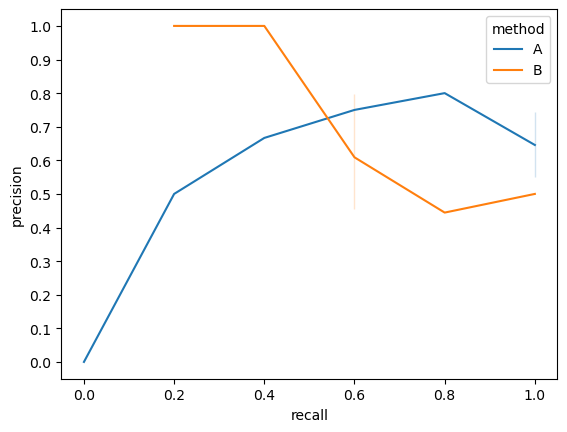

In [58]:
plot = sns.lineplot(data=pd.concat([A_df, B_df]), x='recall', y='precision', hue='method')
plot.set(yticks=np.arange(0,1.1,0.1))

# X=Rank,  Y=Precision

In [59]:
A_df = pd.DataFrame({'precision': precision_A, 'recall': recall_A, 'method': 'A', 'rank': range(1,11)})
B_df = pd.DataFrame({'precision': precision_B, 'recall': recall_B, 'method': 'B', 'rank': range(1,11)})

[[<matplotlib.axis.YTick at 0x207437b9750>,

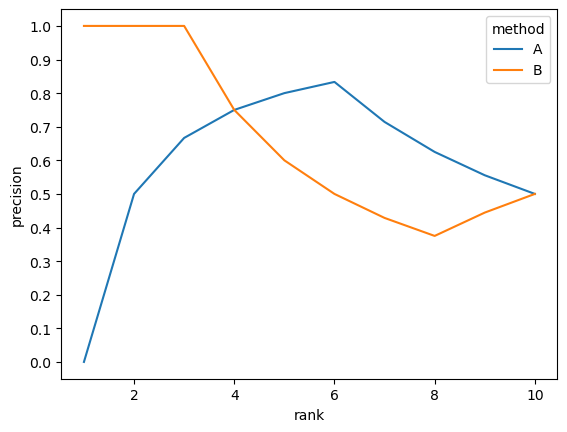

In [60]:
plot = sns.lineplot(data=pd.concat([A_df, B_df]), x='rank', y='precision', hue='method')
plot.set(yticks=np.arange(0,1.1,0.1))

# (2) ap -- pg 27

In [61]:
A_AP = np.sum(precision_A*recommendation_A)/num_relevant
B_AP = np.sum(precision_B*recommendation_B)/num_relevant

In [62]:
A_AP

0.71

In [63]:
B_AP

0.788888888888889

# (3) ndcg -- pg 40

In [93]:
ideal = np.array([3,3,3,3,3])
report_a = np.array([1, 3, 3, 3, 3, 1, 3, 1, 1, 1])
report_b = np.array([3, 3, 3, 1, 1, 1, 1, 3, 3, 1])

In [94]:
discount = [1/np.log2(i+1) for i in range(1, 11)]

In [95]:
Ideal = (ideal * discount[:5])[:5].sum()

In [96]:
(report_a * discount)[:5].sum() / Ideal

0.7738931964842559

In [97]:
(report_b * discount)[:5].sum() / Ideal

0.8151510484299679